In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Мы считали все таблицы, что даны в задании
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')
#Дальше мы проверили есть ли там пустые значения (их нет)
train.isnull()
test.isnull()
#Проверяем типы данных в таблицах
train #Тут есть целые числа, строки, отдельные буквы, дробные числа, а также даты в формате хххх-хх-хх
test #Тут тоже самое, что и в прошлом 
#Вывод - В файле train_final есть столбец - is_canceled. Очевидно он для нас самый главный, ведь нам как раз надо проверить, отменит пользователь бронь или нет
#В файле test_final такого столбца нет, так как это тестовый датасет и в нём нет ответа. Нам нужно самим сказать будет отменена бронь или нет

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23520,City Hotel,180,2016,May,22,23,1,5,2,0.0,...,A,A,0,No Deposit,0,Transient,80.75,0,0,2016-05-29
23521,City Hotel,4,2016,November,45,1,0,3,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,1,2016-11-04
23522,City Hotel,3,2016,May,21,16,1,1,1,0.0,...,A,A,0,No Deposit,0,Transient,65.00,0,0,2016-05-18
23523,Resort Hotel,312,2017,March,10,5,2,5,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,30.00,0,0,2017-01-11


In [11]:
#Проверяем баланс классов
train["is_canceled"].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

In [36]:
train.loc[ : , train.dtypes == "object"]

""
0
1
2
3
4
...
44633
44634
44635
44636


In [30]:
train = train.drop(columns=['reservation_status_date', 'country', 'reserved_room_type', 'assigned_room_type'])
test = test.drop(columns=['reservation_status_date', 'country', 'reserved_room_type', 'assigned_room_type'])

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train['arrival_date_month'])

train['arrival_date_month'] = label_encoder.transform(train['arrival_date_month'])
test['arrival_date_month'] = label_encoder.transform(['arrival_date_month'])

In [35]:
categories = train.loc[:, train.dtypes == 'object'].columns
for i in categories:
  label_encoder.fit(train[i])

  train[i] = label_encoder.transform(train[i])
  test[i] = label_encoder.transform(test[i])

In [20]:
#Обучаем модель
x = train.drop(columns = ['is_canceled'])
y = train['is_canceled']

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x, y)

pred = model.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(pred,y))
print(precision_score(pred,y))
print(recall_score(pred,y))

0.776580491957525
0.37639265281541706
0.7474958887726117


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


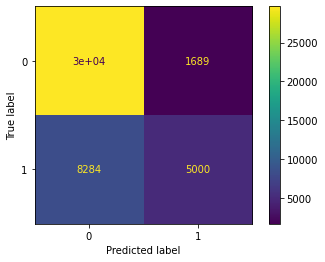

In [25]:
from sklearn.metrics import  plot_confusion_matrix

plot_confusion_matrix(model, x,y)
plt.show()
#масштабировать данные, читать, что можно удалять а что нет, балансировка данных

In [37]:
test_pred = model.predict(test)

test_pred = pd.DataFrame(test_pred, columns=['is_canceled'])

test_pred = test_pred.reset_index()

test_pred.to_csv('solution.csv', index = False)